<font color='blue'> Привет. Поздравляю с первым сборным проектом. Ниже мои комментарии выделены синим. </font>

# Описание Проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


Описание данных
Name — название игры
Platform — платформа
Year_of_Release — год выпуска
Genre — жанр игры
NA_sales — продажи в Северной Америке (миллионы долларов)
EU_sales — продажи в Европе (миллионы долларов)
JP_sales — продажи в Японии (миллионы долларов)
Other_sales — продажи в других странах (миллионы долларов)
Critic_Score — оценка критиков (максимум 100)
User_Score — оценка пользователей (максимум 10)
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.

# Шаг 1. Открою файл 

In [3]:
# загружу все необходимые библиотеки и открою файл games.csv

import pandas as pd
import numpy as np
from scipy import stats as st
from scipy.stats import ttest_ind
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly

games = pd.read_csv('/datasets/games.csv')

Посмотрю на данные и проверяю соответствие типов данных 

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
games.head(15) 
#games['Platform'].unique()


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Первое что бросается в глаза огромное количество игровых платформ, чувствую что они и будут играть ключевую роль в построении гипотезы и категоризации данных. Для начала заведу себе понятный словарик по этим аббревиатурам

Wii - Nintendo Wii (light-past console) - 2006

Nes - Nintendo Entertainment System (8 bit console) - 1983

GB - Game Boy (8 bit handed console) - 1989

DS - Nintendo DS (handed console) - 2004

X360 - Xbox 360 (light-past console) - 2005

PS3 - PlayStation 3  (light-past console) - 2006

PS2 - PlayStation 2  (old console) - 2000

SNES - Super Nintendo Entertainment System (16 bit old console) - 1990

GBA - Game Boy Advanse (16 bit handed console) - 2001

PS4 - PlayStation 4  (modern console) - 2013

3DS - Nintendo 3DS (modern handed console) - 2011

N64 - Nintendo 64 (64 bit console) - 2002

PS - PlayStation ( old console) - 1994

XB - Xbox 1st generation (old console) - 2001

PC - Prof.Computer 

2600 - Atari 2600 ( old 8 bit console) - 1977

PSP - PlayStation Portable (handed console) - 2005

XOne - X Box One  (modern console) - 2013

Wii U - Wii U (modern console) - 2012

GC - Nintendo GameCube (old console) - 2001

GEN - Bluetooth Game Pad ( modern handed console)

DC - Dreamcast (old video console) - 2001

PSV - PlayStation Vita ( modern handed console) 2012

SAT - Sega Saturn (old video console) - 1994

SCD - Sega CD (old video console) - 1991

WS - WonderSwan (handed console) - 2000

NG - Neo Geo (old video console) - 1990

TG16 - TurboGrafx-16 (old video console) - 1990

3D0 - 3DO Interactive Multiplayer (old video console) - 1994

GG - GameGear (old handed console) - 1990

PCFX - PC-FX (old video console) - 1994 

Проверю на дубликаты данные

In [6]:
#проверю на дубликаты

#games.duplicated().sum()

#полных дубликатов нет - все гуд

Перехожу в предобработку данных , там приведу таблицу в порядок 

<font color='blue'> Хорошо, рассмотрение достаточно подробное. </font>

# Шаг 2. Предобработка данных

In [7]:
# замените название столбцов (приведите к нижнему регистру)

games.columns = games.columns.str.lower()


# проверю данные на пропуски по столбцам
#games['name'].isnull().sum()

#всего 2 пропуска, значение смешное, но продажи этих игр тоже должны быть учтены, поменяю им название на "неопределенное"

games['name'] = games['name'].fillna('undefined')

#games['year_of_release'].isnull().sum()
# 269 пропусков , надо заменить на 0 и заодно пофиксим формат , уберем плавающую точку

games['year_of_release'] = games['year_of_release'].fillna('0.0').astype('float').astype('int')

#идем дальше , вижу еще пропуски в оценке игр от критиков, пользователей и пропуски в рейтинге - пофиксим все


#games['critic_score'].isnull().sum()
games['critic_score'] = games['critic_score'].fillna('0.0').astype('float').astype('int')

#games['user_score'].unique()
# в столбце имеются пропуски и знения tbd, tbd = to be discussed, то есть по факту оценки нет, а это значит что в данный момент она равна 0
games['user_score'] = games['user_score'].fillna('0.0')

# так пропуски убрал, но еще нужно перевести формат из объекта в int, надо заменять tbd на 0 - иначе ошибка вылезает
# с помощью лямбды найдем значения tbd и поменяем их на 0, потом сразу поменяю тип данных

games['user_score'] = games['user_score'].apply(lambda x: 0 if x == 'tbd' else x).astype('float')

#games.head(15)

# заметил, что оценки пользователей и оценки критиков находятся в разных системах координат, надо провести к единому, 
# умножу оценку пользователей на 10, можно через функцию или лямбду как делал выше , через лямбду проще код будет в одну строчку

games['user_score'] = games.apply(lambda x: int(x['user_score'] * 10), axis = 1)

#так теперь последний столбик остался rating , глянем что в нем

#games['rating'].unique()
#games['rating'].isnull().sum()
# вау а в нем 6766 пропусков, это 2/3 всеъ данных и вообще данных по рэйтингу меньше чем во всей таблице, 
# значит там где пропуск данных нужно заменить на что то вроде "no rating", что бы в анализе использовать

games['rating'] = games['rating'].fillna('No rating')

#games['rating'].unique()
#games.info()

games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

games.head()

#games['user_score'].unique()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,80,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0,No rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,83,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,80,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0,No rating,31.38


<font color='blue'> Предобработка сделана хорошо. Только надо понимать, что заполнить года выпуска 0 = удалить, т.к. весь дальнейший анализ ведется в разрезе годов релиза. </font>

<font color='blue'> Целевой паарметр рассчитан верно - можно переходить к анализу. </font>

вроде с предобработкой все законченно , перехожу к шагу 3

# Шаг 3. Проведите исследовательский анализ данных 

Построю гистаграмму выпуска игр по годам 

Text(0, 0.5, 'Количество')

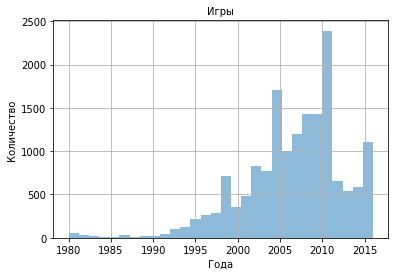

In [8]:
#games['year_of_release'].unique()
#games.[games['year_of_release'] == 0]['year_of_release'].count()
games[games['year_of_release'] != 0]['year_of_release'].hist(bins = 30, alpha=0.5)
plt.title('Игры',fontsize=10)
plt.xlabel("Года", fontsize=10)
plt.ylabel("Количество",fontsize=10)

<font color='blue'> Хорошо, все верно. </font>

Text(0, 0.5, 'Деньги,$ млн')

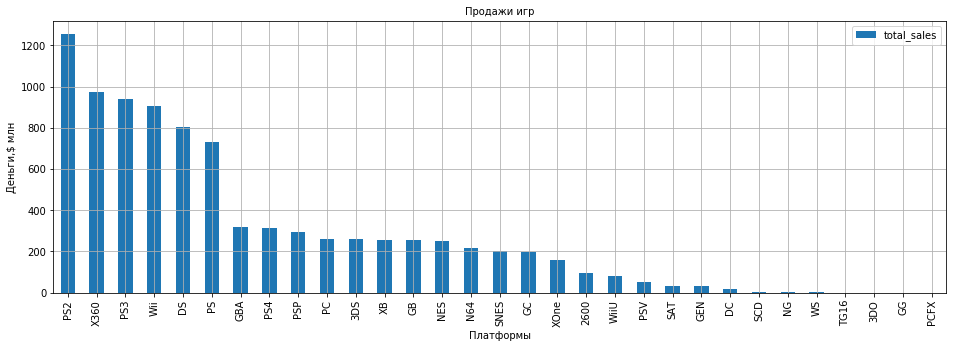

In [9]:
(games
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending = False)
    .plot(grid=True,kind='bar', figsize=(16,5))
)
plt.title('Продажи игр',fontsize=10)
plt.xlabel("Платформы", fontsize=10)
plt.ylabel("Деньги,$ млн",fontsize=10)

<font color='blue'> Лидеры продаж определены правильно. </font>

Text(0.5, 0.98, 'Распределение платформ по годам')

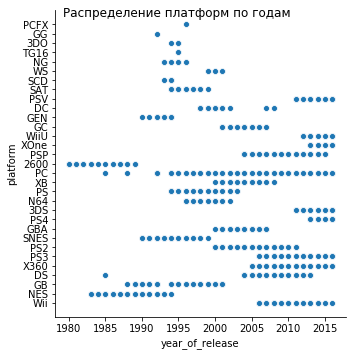

In [10]:
#games.info() 
games_non_zero_years = games.query('year_of_release !=0')
g = sns.relplot(x="year_of_release", y="platform", data=games_non_zero_years)
g.fig.suptitle("Распределение платформ по годам")
#sns.regplot(x="year_of_release", y="platform", data='years_of_release');

<font color='blue'> Ок, и здесь все наглядно. </font>

Cначала 90-х годов пошел резкий рост выпуска игр, к 2010 году он достиг своего апогея и началось снижение, хотя в 2015 появился новый пик (если взять короткий период 2010-2015). 
Какие мысли:
1. В 90-е пошел техно бум, пошел спрос на видео игры разных форматов и прозводители ударились в расширенение линейки платформ
помимо классических консолей, появились "ручные" приставки итд. Как раз где-то к 2010 году (когда пошли массово смартфоны) бум на производство разных консолей ушел на нет  => не нужно производить столько множеств игр. Думаю в этом причина. В любом случае , как мне кажется, нам для анализа нужны данные последних лет :). Потому что это текущие реали рынка, и конкуренции прежде всего с мобильными играми.  

2. Как показывает срез по платформам, нам для анализа необходимо взять максимум 5 лет, но я считаю, что лучше взять 2-3 года м. На данном рынке за такое время происходит большие изменения в техническом плане, то есть игры становятся все лучше прорисованы. Это параметр как минимум один, сюда можно отнести и улучшение физики игры итд. То есть с каждым годом игры улучшаются и становятся все ближе к реальной жизни. Что касается срока жизни платформы, то зависи от эпохи. Совсем неудачные проекты закрывались спустя 1-2 года, в среднем жили 5-10 лет. Но опять же это связано с тем, что в 90-е года шло молнейносное улучшение технического потенциала, сейчас такой бум невозможен просто потому, что на текущим этапе развития уже не осталось настолько очевидных решений для большого скачка в видео играх, скорее происходит более точечный тюнинг визуала и физики 
В общем волевым решением беру актуальный период с 2014 года, то есть данные за 3 года ( 2014,2015,2016) 

<font color='blue'> Актуальный период определен верно. </font>

Text(0, 0.5, 'Деньги,$ млн')

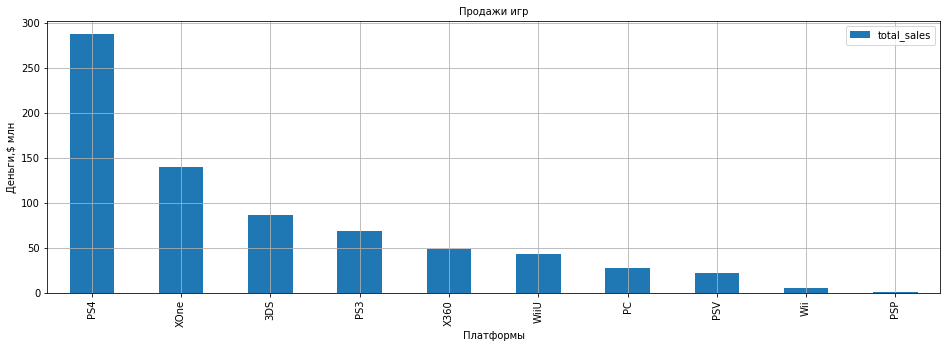

In [11]:
games_actual = games.query('year_of_release >= 2014')
#games_actual.info()
#неплохо я срезал данных, теперь 1108 строк в df

(games_actual
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending = False)
    .plot(grid=True,kind='bar', figsize=(16,5))
)
plt.title('Продажи игр',fontsize=10)
plt.xlabel("Платформы", fontsize=10)
plt.ylabel("Деньги,$ млн",fontsize=10)


<font color='blue'> Актуальные платформы приведены правильно. </font>

Для было и раньше понятно, что PS4 и XboxOne это топ который мы и будем анализировать, проверю топ 3 отдельно на динамику продаж по годам

Text(0, 0.5, 'Деньги,$ млн')

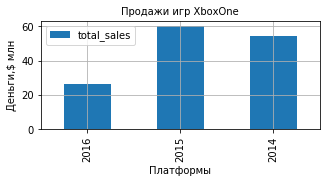

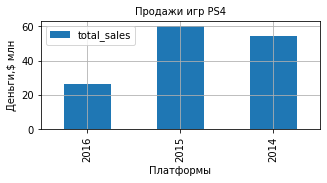

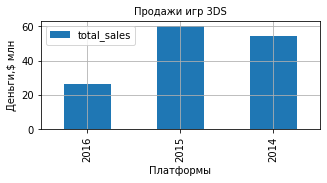

In [12]:
xbox = games_actual.query('platform == "XOne"')
(xbox
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    .sort_values(by='year_of_release', ascending = False)
    .plot(grid=True,kind='bar', figsize=(5,2))
)
plt.title('Продажи игр XboxOne',fontsize=10)
plt.xlabel("Платформы", fontsize=10)
plt.ylabel("Деньги,$ млн",fontsize=10)

ps4 = games_actual.query('platform == "PS4"')
(xbox
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    .sort_values(by='year_of_release', ascending = False)
    .plot(grid=True,kind='bar', figsize=(5,2))
)

plt.title('Продажи игр PS4',fontsize=10)
plt.xlabel("Платформы", fontsize=10)
plt.ylabel("Деньги,$ млн",fontsize=10)

ds = games_actual.query('platform == "3DS"')
(xbox
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    .sort_values(by='year_of_release', ascending = False)
    .plot(grid=True,kind='bar', figsize=(5,2))
)

plt.title('Продажи игр 3DS',fontsize=10)
plt.xlabel("Платформы", fontsize=10)
plt.ylabel("Деньги,$ млн",fontsize=10)

В общем ничего удивительного нет, продажи растут - это топ 3 игровых платформ сейчас в мире (2016 видимо не полная дата за год в датафрейме)

In [13]:
games_actual_platform = games_actual.query('platform =="XOne" or platform =="PS4" or platform =="3DS"')

#games_actual_platform.info()
# у нас получается 816 строк, то есть после нашего среза по выходу игры, я убрал еще лишние платформы
# выбор свой сделал правильно еще потому, что на эти платформы пришлось 73% всего датафрейма

In [14]:
#xbox.describe()
#xbox.sort_values(by='total_sales',ascending = False)
#ps4.describe()

In [15]:
games_actual_platform.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 31 to 16677
Data columns (total 12 columns):
name               816 non-null object
platform           816 non-null object
year_of_release    816 non-null int64
genre              816 non-null object
na_sales           816 non-null float64
eu_sales           816 non-null float64
jp_sales           816 non-null float64
other_sales        816 non-null float64
critic_score       816 non-null int64
user_score         816 non-null int64
rating             816 non-null object
total_sales        816 non-null float64
dtypes: float64(5), int64(3), object(4)
memory usage: 82.9+ KB


(0, 2)

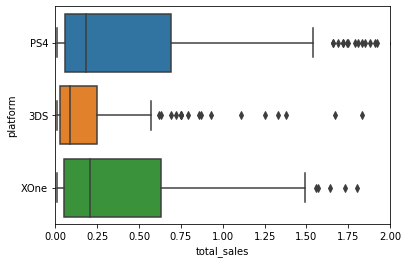

In [16]:
sns.boxplot(y="platform", x="total_sales",data=games_actual_platform)
plt.xlim(0, 2)

Построил ящик с усами, он показал, что все продажи сильно смещенные вправо,т.е распределение. Медиана сильно отличается от среднего. Сам ящик показал, насколько близки xbox one и ps4 по всем значениям. Как вывод, дальнейший анализ можно строить на одной или двух платформах: XboxOne и PS4. 

<font color='blue'> Ящики с усами построены правильно. </font>

Для следующее анализа: влияния отзывов пользователей и критиков на продажи, я возьму самую популярную платформу PS4.

Только нужно проверить на выбросы оценки пользователей и критиков 

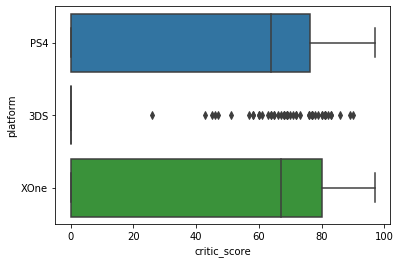

In [17]:
sns.boxplot(y="platform", x="critic_score",data=games_actual_platform)

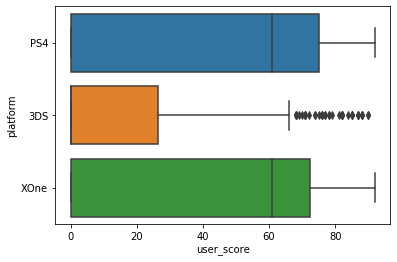

In [18]:
sns.boxplot(y="platform", x="user_score",data=games_actual_platform)

<font color='blue'> Отлично, и здесь ящики тоже корректные. </font>

Для анализа зависимости оценок к продажам, необходимо исключить выбросы, в нашем случае это видимо небольшое кол-во провальных игр.Берем в анализ оценки от 45  от критиков и от 37 от пользователей и посмотрим зависимости

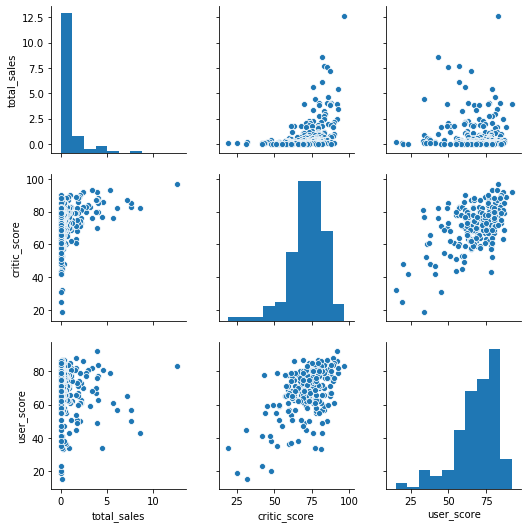

In [19]:
# небольшая поправочка, настало время убрать 0 из оценок и продаж

ps4 = ps4.query('user_score != 0 & critic_score != 0 & total_sales != 0 ')

sns.pairplot(ps4[['total_sales', 'critic_score', 
                 'user_score']]);

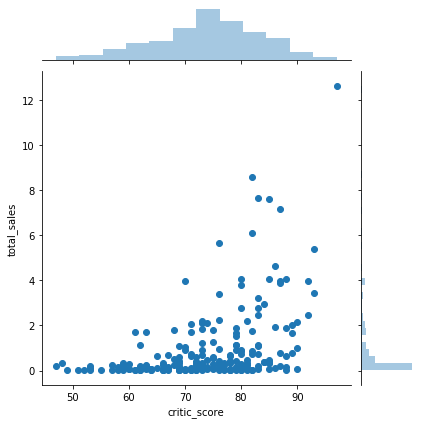

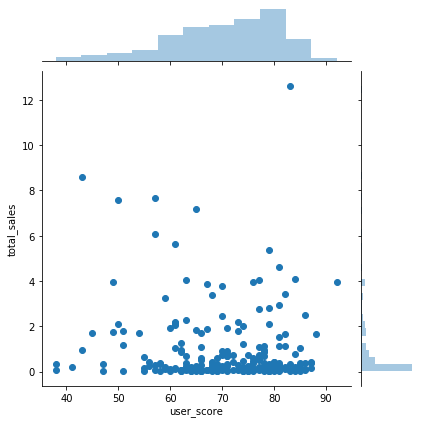

In [40]:
sns.jointplot(x='critic_score', y='total_sales', 
              data=ps4, kind='scatter');

sns.jointplot(x='user_score', y='total_sales', 
              data=ps4, kind='scatter');

Я использовал библиотеку seaborn, что бы нагляднее посмотреть зависимость продаж от оценок пользователей и критиков. Теперь посмотрю "табличную" корреляцию 

In [20]:
corr = ps4.corr()

# довалю цветовую матрицу

corr.style.background_gradient(cmap = 'coolwarm')

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1,-0.230985,-0.183494,-0.0931716,-0.221852,-0.0434165,0.0289382,-0.216492
na_sales,-0.230985,1,0.712972,0.56698,0.91573,0.410773,-0.0188468,0.892578
eu_sales,-0.183494,0.712972,1,0.541119,0.934511,0.339526,-0.0673769,0.951783
jp_sales,-0.0931716,0.56698,0.541119,1,0.598046,0.378852,0.182245,0.618891
other_sales,-0.221852,0.91573,0.934511,0.598046,1,0.403824,-0.0472671,0.998054
critic_score,-0.0434165,0.410773,0.339526,0.378852,0.403824,1,0.546434,0.401903
user_score,0.0289382,-0.0188468,-0.0673769,0.182245,-0.0472671,0.546434,1,-0.0431859
total_sales,-0.216492,0.892578,0.951783,0.618891,0.998054,0.401903,-0.0431859,1


Проведу еще подобное исследование по платформе Xbox, так как сказать проверить гипотезу 

Только нужно проверить на выбросы оценки пользователей и критиков 

In [2]:
corr = xbox.corr()

# довалю цветовую матрицу

corr.style.background_gradient(cmap = 'coolwarm')

NameError: name 'xbox' is not defined

Продолжаем копать и искать еще факторы, влияющие на продажи. 
Но в копилку влияние оценок, как необходимый фактор для продаж мы себе записываем.

<font color='blue'> Корреляция проанализирована правильно. </font>

посмотрю разбивку по жанрам , определю какие самые прибыльные 

(0, 5)

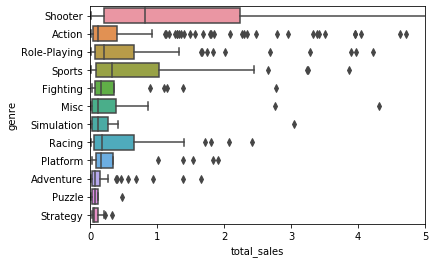

In [69]:
sns.boxplot(y="genre", x="total_sales",data=games_actual_platform)
plt.xlim(0, 5)

<font color='blue'> Жанры выделены верно. </font>

Выводы :

1. Существует зависимость между оценками критиков и пользователей (0.40) неюольшая , но есть (ps4 df)
2. Существует зависимость от оценок критиков к продажам , но она далеко не единственный фактор влияющий на продажи
3. Пользователи более сентиментальны, это значит что характерны большие продажи игр при средних оценках ( критики такого себе не позволяют - это и понятно, они же проф. оценщики). Скорее всего пользователи покупают массово продолжения своих любимых игр, и как часто бывает, продолжение хуже первой или любой ,другой по номеру,легендарной части игры/фильма и разочерование оставляет след в оценках.
4. Видно что большую значимость для тотальных продаж несет продажи в каждом регионе, но продажи в Японии не так сильно влият - хм интересный факт

5. Посмотрел коллеряцию зависимости на данных платформы xbox, цифры немножко другие , но тренд такой же.
Интересно, только одно, пользовательские оценки очень зависят от оценок критикиов. Пользователи xbox one, имейте свое мнение)

6. Самые прибыльные жанры это шутеры, спортивные игры, гоночные,rpg и экшин. Это тоже важный фактор влияющий на тотальные продажи

так вроде бы в шаге 3 все сделал, перехожу в шаг 4

# Шаг 4. Составьте портрет пользователя каждого региона 

Определите для пользователя каждого региона (NA,EU,JP) 

1. Самые популярные платформы (топ 5). Опишите различия в долях 

Для того чтобы отрисовать графики, как вариант, нужно использовать функцию 

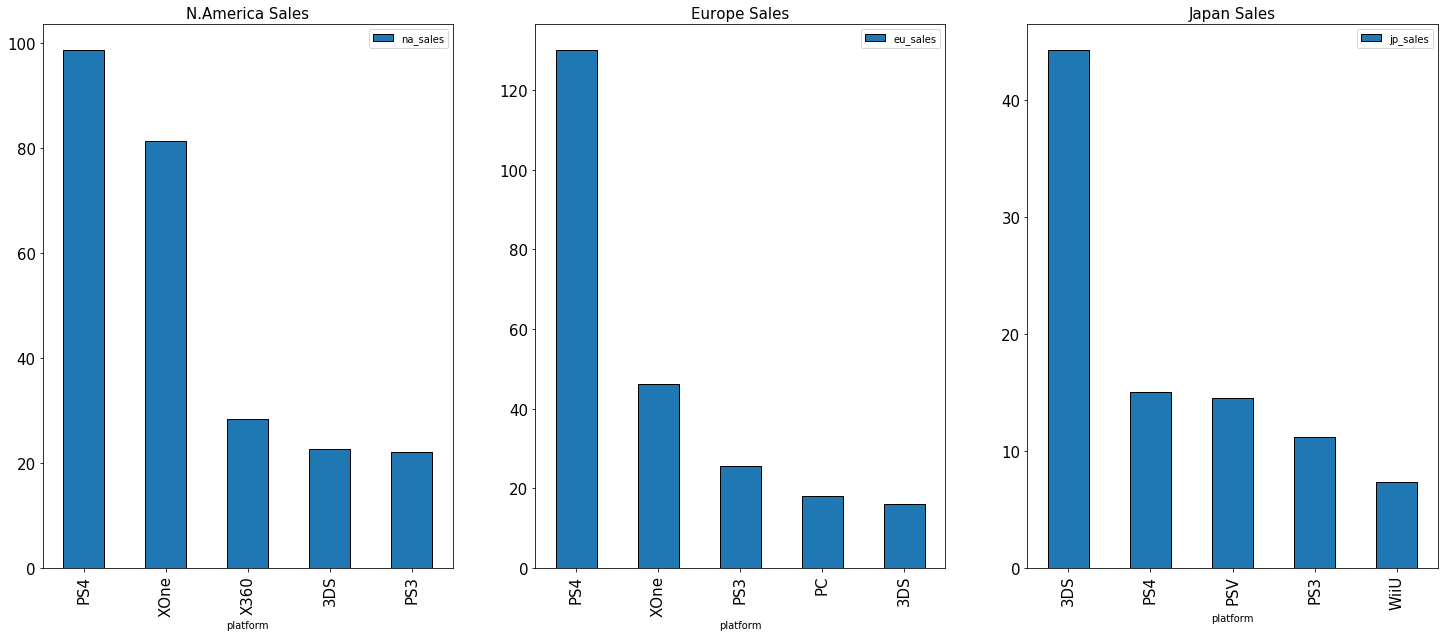

In [70]:
# функция содержит в себе групировку, суммирование по продажам и сам график 
def sales_by_regions(groupby, sales, ax):
    pivot = games_actual.groupby(groupby).agg({sales: 'sum'}).sort_values(by=sales, ascending=False)[:5]
    title = {'na_sales': 'N.America Sales', 'eu_sales': 'Europe Sales', 'jp_sales': 'Japan Sales'}
    plot = pivot.plot(kind='bar', ec='black', ax=axes[ax], title=title[sales], fontsize=15)
    plot.title.set_size(15)

fig, axes = plt.subplots(1, 3, figsize=(25,10))    
sales_by_regions('platform', 'na_sales', 0)
sales_by_regions('platform', 'eu_sales', 1)
sales_by_regions('platform', 'jp_sales', 2)
  

Напомню, что я смотрю срез только с 2014 года, так как убежден, что именно эти года наиболее актуальны для определения прогноза на 2017 год. 

Как мы видим на графиках, Северная  Америка и Европа имеет в топ 2 - PS4 и XboxOne - это было понятно на интуитвном уровне, так как эти консоли основные. В Северной Америке отставание Xbox не такое сильное как в Европе, объясняется тем, что производитель Xbox One - это  Microsoft. В Японии все как всегда иначе, что сказать, другой мир, 3DS там чемпион) , a xbox one вообще курит в сторонке и не вошел в топ5

Теперь нам нужно посмотреть самые популярные жанры (топ 5) по тем же регионам.

и поможет нам та самая функция выше. все больше и больше я их начинаю чтить (я про функции :) ) 

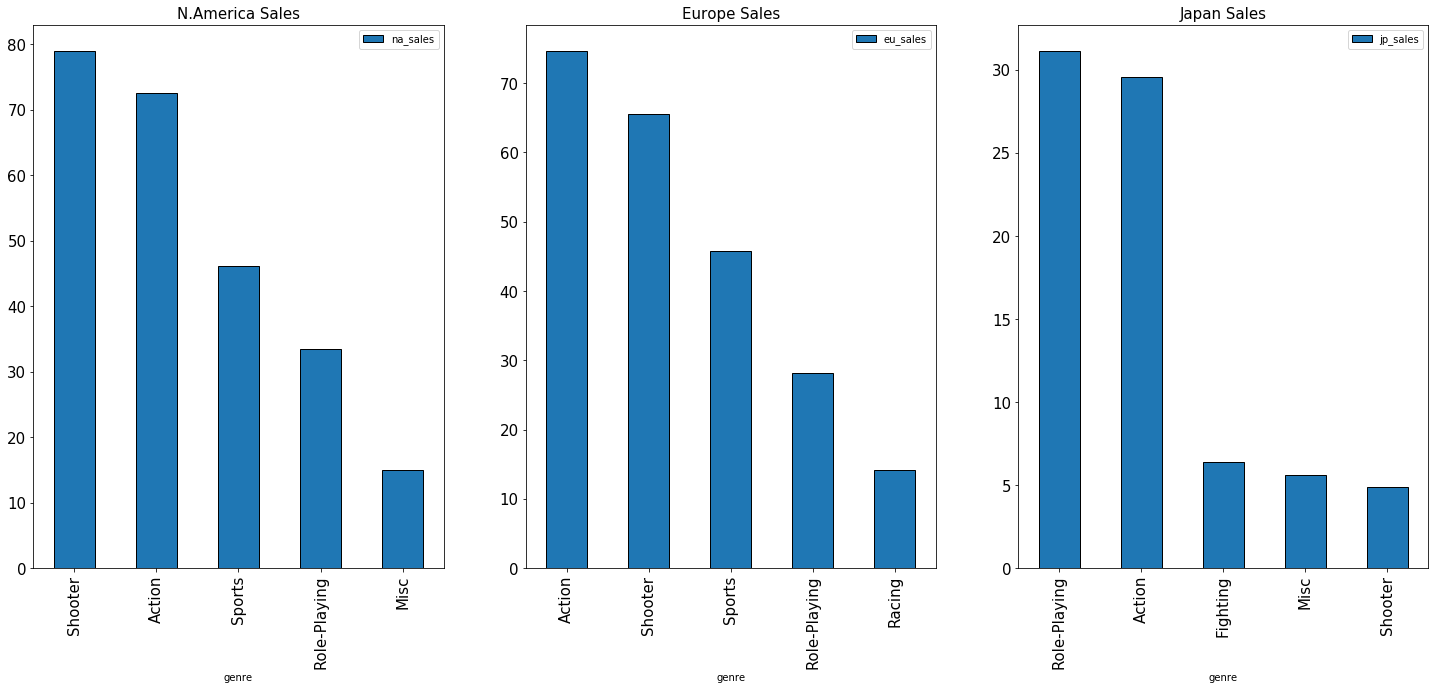

In [71]:
fig, axes = plt.subplots(1, 3, figsize=(25,10))    
sales_by_regions('genre', 'na_sales', 0)
sales_by_regions('genre', 'eu_sales', 1)
sales_by_regions('genre', 'jp_sales', 2)

Североамериканцы и европейцы имеют почти одинаковые вкусы: Шутеры, Экшин, Спортивные игры, Рпг. Топ 3: Шутеры, Экшин, Спорт
А Японцы, как всегда, удивляют у них мего популярен РПГ , правда и Экшин не отстает. А вот Шутеры не жалуют совсем

Сразу запишу свои мысли, что второй важный фактор, который влияет на продажи, это какой тип жанра в каком регионе будет продвигаться. Как бы мы не старались, но успешно продать Шутер будет нереально

Влияет ли рейтинг ESRB на продажи в каждом регионе?

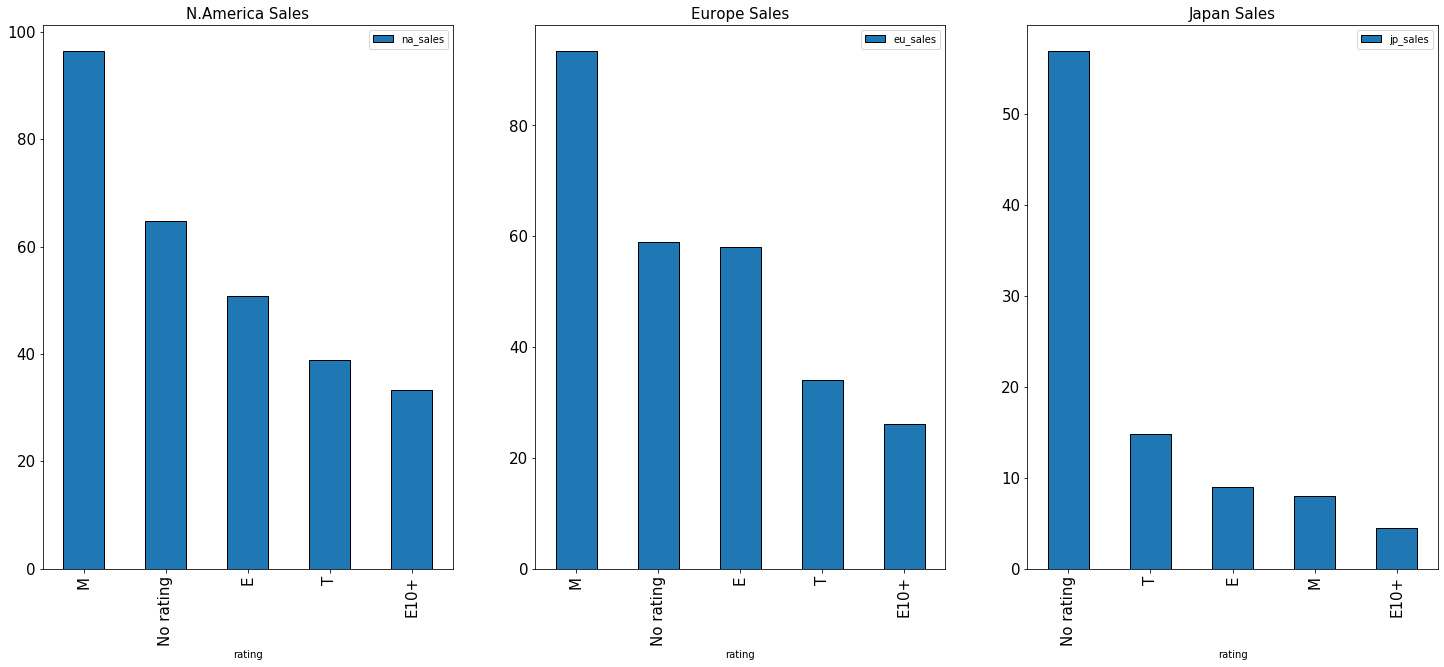

In [72]:
#games_actual['rating'].unique()
fig, axes = plt.subplots(1, 3, figsize=(25,10))    
sales_by_regions('rating', 'na_sales', 0)
sales_by_regions('rating', 'eu_sales', 1)
sales_by_regions('rating', 'jp_sales', 2)

Пришлось загуглись рейтинги ESRB, что бы разобратся, что к чему, в общем, пропишу тут, что:

M - Mature, игры для взрослых 17+(да 17 ,а не 18- странно)
No Rating - это понятно, что рейтинг не указан, тут либо его забыли указать , либо его нет. я буду считать это как для всех 
E - Для Всех 
Т -  13+
E10+ - 10+

Теперь вывод:

с 2014 года в СА и Европе популярны игры для "Взрослых" - оно и понятно, все шутеры содержат в себе массивы крови и плоти
Дальше объединенный рейтинг игр для всех, потом подростки , ну и потом уже для всех 10 лет +

В Японии, опять же я буду придерживаться своей парадигме, что no rating в большей степени это для всех игры - лидируют они, а дальше ,удивление, следуют игры для подростков 13+.

Что можно сказать, что в Японии начинают играть раньше чем в Европе и СА, с 13 лет :)

P.S вот нам еще один фактор, влияющий на продажи в конкретном регионе. 

Перехожу к Шагу 5. 

<font color='blue'> Отлично, портрет пользователя получен верно. все четко и наглядно </font>

# Шаг 5. Проверьте гипотезы

Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза = Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Альтернатива = не равны
alpa = 0.05

In [91]:
xbox = games_actual[(games_actual['platform'] == 'XOne') & (games_actual['user_score'] > 0)]['user_score']
pc = games_actual[(games_actual['platform'] == 'PC') & (games_actual['user_score'] > 0)]['user_score']

alpha = .05

results = st.ttest_ind(xbox,pc)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10450507919348487
Не получилось отвергнуть нулевую гипотезу


Получается, что средние значения оценок не отличаются, а вот ради интереса, посмотрю я за весь период времени 

In [97]:
xbox = games[(games['platform'] == 'XOne') & (games['user_score'] > 0)]['user_score']
pc = games[(games['platform'] == 'PC') & (games['user_score'] > 0)]['user_score']

alpha = .05

results = st.ttest_ind(xbox,pc)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3896435533548407e-05
Отвергаем нулевую гипотезу


Ха, интересный факт, а вот за все время данных, средние оценки очень сильно отличаются между Xbox One и PC

Гипотеза 2. Средние пользовательские рейтинги жанров Action и Sports разные

Нулевая гипотеза = средние пользовательские рейтинги жанров Action и Sports одинаковые
Альтернатива  = не равны

In [98]:
action = games_actual[(games_actual['genre'] == 'Action') & (games_actual['user_score'] > 0)]['user_score']
sport = games_actual[(games_actual['genre'] == 'Sports') & (games_actual['user_score'] > 0)]['user_score']

alpha = .05

results = st.ttest_ind(action,sport)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.871114798510669e-19
Отвергаем нулевую гипотезу


Так, получается, что с 2014 года средние пользовательские оценки между Экшином и Спортом сильно разнятся, давайте посмотрим историю за все время данных

In [99]:
action = games[(games['genre'] == 'Action') & (games['user_score'] > 0)]['user_score']
sport = games[(games['genre'] == 'Sports') & (games['user_score'] > 0)]['user_score']

alpha = .05

results = st.ttest_ind(action,sport)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10406951359050073
Не получилось отвергнуть нулевую гипотезу


И вот снова в обраточку, за все время данных средние пользовательские оценки между жанром Спорт и Экшин - не отличаются. 

<font color='blue'> Гипотезы сформулированы и проверены верно. </font>

# Шаг 6. Общий вывод

Проведенный анализ показал много интересного:

1. Оценки критиков влияют на продажи игр, влияют сильнее чем оценки пользователей
2. Определенный жанр в определенном регионе также влияет на продажи, пример : Шутер и Экшин для Европы и СА, а РПГ для Японии
3. Возрастной рейтинг также влияет на  продажи в определенном регионе, яркий пример Япония. 

4. Очень важно было делать срез, по актуальности, я сделал с 2014 года и как видно, данные сильно отличаются чем в общей дате.
Проверка гипотез это прекрасно показала. 

Как нужно для планирования промоушина в 2017 году:

1. Выбрать точно регион для которого подходит игра или набор игр - по жанру.
2. По мимо жанра, игры должны соответствовать регину в ццензурном рейтинге
3. Провести работу с критиками, чтобы получить желаемые высокие оценки :)


<font color='blue'> Отличный проект, Классное завершение модуля, молодец. Удачи в следующих проектах. </font>